# Open CV

## Librerias

In [14]:
import cv2 as cv
import numpy as np


# visualización 
from matplotlib import pyplot as plt

In [11]:
# configuracion de graficas

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## GUI

### Ver Imagen

In [ ]:
# leer imagen
img = cv.imread(cv.samples.findFile("data/colibri.jpg"))

if img is None:
    sys.exit("Could not read the image.")
    
# display imagen
cv.imshow("Display window", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("starry_night.png", img)


### Ver Video

In [ ]:
# guardar video
cap = cv.VideoCapture('data/01.avi')
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    
    #gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY) # aplicar escala de grises
    cv.imshow('frame', frame) # mostrar video
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()



### Capturar Video

In [ ]:
# capturar video
cap = cv.VideoCapture(0)

# crear VideoWriter (guardar video)
fourcc = cv.VideoWriter_fourcc(*'XVID')
# definir path para guardar video
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))
while cap.isOpened(): # mientras la camara captura
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #frame = cv.flip(frame, 0) # voltear video
    # escribir cada frame
    out.write(frame)
    cv.imshow('frame', frame) # mostrar video capturado
    if cv.waitKey(1) == ord('q'):
        break
# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

### Dibujar geometrias

In [ ]:
# dibujar geometrias

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# dibujar linea azul
cv.line(img,(0,0),(511,511),(255,0,0),5)
# dibujar rectangulo verde
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
# dibujar circulo
cv.circle(img,(447,63), 63, (0,0,255), -1)
# dibujar elipse
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# dibujar poligono
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))

cv.imshow("Display window", img)



In [ ]:
# agregar texto
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

In [ ]:
# ver eventos de mouse
events = [i for i in dir(cv) if 'EVENT' in i]
print( events )

In [ ]:
# mouse callback

# dibujar circulo
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK: # clic izquierdo
        cv.circle(img,(x,y),100,(255,0,0),-1)
        
# crear fondo negro
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image') # nombre de ventana
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [ ]:
drawing = False # true si presiona el mouse
mode = True # True, dibuja rectangulo. Press 'm' para curva
ix,iy = -1,-1

# funció mouse callback 
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
            
            
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image') # nombre de ventana
cv.setMouseCallback('image',draw_circle) # aplicar funcion callback
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()

### Trackbar

In [ ]:
# crear trackbar: 
def nothing(x):
    pass

# crear fondo negro en ventana
img = np.zeros((300,512,3), np.uint8)
cv.namedWindow('image') # nombre de ventana

# crear barras de color RGB
cv.createTrackbar('R','image',0,255,nothing)
cv.createTrackbar('G','image',0,255,nothing)
cv.createTrackbar('B','image',0,255,nothing)
# create switch for ON/OFF functionality

# crear switch ON/OFF
switch = '0 : OFF \n1 : ON'
# crear Trackbar
cv.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv.imshow('image',img) # mostrar imagen
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
    # extraer posicion de 4 trackbars
    r = cv.getTrackbarPos('R','image')
    g = cv.getTrackbarPos('G','image')
    b = cv.getTrackbarPos('B','image')
    s = cv.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv.destroyAllWindows()

## Core

In [3]:
# cargar imagen a color
img = cv.imread('data/lemon.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"


### Modificar pixel (casilla)

In [4]:
# extraer pixel por coordenadas x,y (fila,columna)
# retorna array de formato de pixel (RGB)
pixel = img[100,100]
pixel


array([255, 255, 255], dtype=uint8)

In [5]:
azul = img[100,100,0] #pixel azul
azul

255

In [6]:
# cambiar valor de pixel
img[100,100] = [255,255,255] # cambiar (color) de pixel


In [9]:
# acceder a valor RED de pixel
img.item(10,10,2)

# modificar valor RED de pixel 
img.itemset((10,10,2), 100) # valor RED de pixel a modificar, nuevo valor
img.item(10,10,2)


100

### Propiedades de Imagen

In [10]:
# extraer propiedades de imagen

# filas, columnas, canales
img.shape

(2040, 2460, 3)

In [11]:
# numero de pixeles (casillas en matriz)
img.size

15055200

In [12]:
# tipo de imagen
img.dtype

dtype('uint8')

### Propiedades ROI

In [2]:
# cargar imagen de Messi
img = cv.imread('data/messi.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"

In [3]:
# extraer bola de imagen
ball = img[280:340, 330:390] 
# copiar bola en otra parte de la imagen
img[273:333, 100:160] = ball



### Merging/Indexing sobre canales de Imagen

In [5]:

# dividir imagen en canales individuales
b,g,r = cv.split(img)


array([[37, 42, 43, ..., 55, 53, 53],
       [40, 44, 46, ..., 59, 58, 56],
       [41, 47, 52, ..., 63, 62, 59],
       ...,
       [52, 45, 40, ..., 53, 57, 57],
       [58, 60, 51, ..., 58, 64, 64],
       [52, 60, 49, ..., 57, 52, 52]], dtype=uint8)

In [6]:
# unir canales BGR de imagen
img = cv.merge((b,g,r))

In [7]:
b = img[:,:,0] # indexing por canales

In [8]:
img[:,:,2] = 0 # cambiar pixeles rojos (canal rojo) a 0

### Agregar Bordes de Imagenes (Padding)

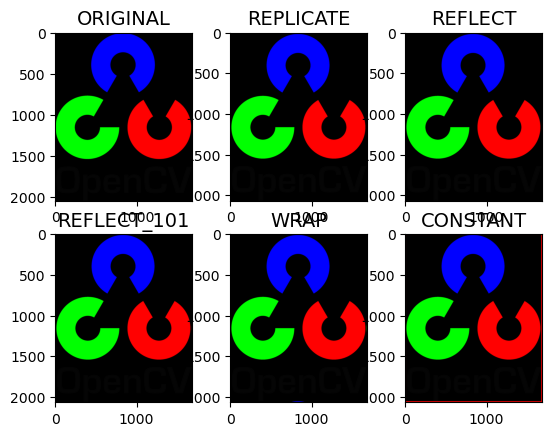

In [12]:

# hacer bordes para imagenes (Padding)


BLUE = [255,0,0]
img1 = cv.imread('data/opencv-logo.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"

# aplicar funciones de bordes sobre imagen
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

# Plot
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()


### Operaciones Aritmeticas

In [16]:
x = np.uint8([250])
y = np.uint8([10])

# sumar
cv.add(x,y)

array([[255]], dtype=uint8)

In [26]:
# $dst=α⋅img1+β⋅img2+γ$
# Here γ is taken as zero.

### Image Blendig

In [ ]:
img1 = cv.imread('data/messi.jpg')
img2 = cv.imread('data/colibri.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# 
dst = cv.addWeighted(img1,0.7,img2,0.3,0)
cv.imshow('dst',dst)
cv.waitKey(0)
cv.destroyAllWindows()

### Bitwise Operations

In [ ]:

# cargar imagenes 
img1 = cv.imread('data/messi.jpg')
img2 = cv.imread('data/colibri.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"


# extraer propiedades de imagen
rows,cols,channels = img2.shape
# crear ROI
roi = img1[0:rows, 0:cols]

# crear mascara gris 
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask) # mascara inversa

# sombrear area de logo
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

### Performance y Optimización

In [20]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
time

3.13e-05

In [21]:
# cargar imagen
img1 = cv.imread('data/messi.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"

e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

0.2075511


In [23]:
cv.useOptimized()
%time res = cv.medianBlur(img, 49)

CPU times: total: 0 ns
Wall time: 9.97 ms


In [25]:
cv.setUseOptimized(False)
cv.useOptimized()
%timeit res = cv.medianBlur(img,49)

7.94 ms ± 70 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Procesamiento de Imágenes

## Feature Detection

## Análisis de Video

## Reconstruicción 3D

## Machine Learning

## Detección de Objetos